# EDA

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
import squarify
plt.rcParams.update(plt.rcParamsDefault)

In [13]:
df = pd.read_csv('spotify_dataset.csv')

In [14]:
df.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [15]:
df.columns

Index(['Index', 'Highest Charting Position', 'Number of Times Charted',
       'Week of Highest Charting', 'Song Name', 'Streams', 'Artist',
       'Artist Followers', 'Song ID', 'Genre', 'Release Date', 'Weeks Charted',
       'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence',
       'Chord'],
      dtype='object')

### Genre formatting
We see the genre is in a format not easily exploitable, so we change it.

In [17]:
df.Genre[:10]

0    ['indie rock italiano', 'italian pop']
1                    ['australian hip hop']
2                                   ['pop']
3                         ['pop', 'uk pop']
4             ['lgbtq+ hip hop', 'pop rap']
5             ['lgbtq+ hip hop', 'pop rap']
6                      ['dance pop', 'pop']
7       ['puerto rican pop', 'trap latino']
8     ['latin', 'reggaeton', 'trap latino']
9    ['indie rock italiano', 'italian pop']
Name: Genre, dtype: object

In [19]:
# extract genres
import re
df.Genre = df.Genre.apply(lambda x : str(x).strip("[]"))
df.Genre = df.Genre.apply(lambda x : str(x).rstrip(' \ '' '))
df.Genre = df.Genre.replace(" 'pop'","'pop'")
df.Genre = df.Genre.apply(lambda x : re.sub("'","",x)) 
df.Genre = df.Genre.apply(lambda x : str(x).lstrip(' '))
df.Genre[:10]

0    indie rock italiano, italian pop
1                  australian hip hop
2                                 pop
3                         pop, uk pop
4             lgbtq+ hip hop, pop rap
5             lgbtq+ hip hop, pop rap
6                      dance pop, pop
7       puerto rican pop, trap latino
8       latin, reggaeton, trap latino
9    indie rock italiano, italian pop
Name: Genre, dtype: object

In [20]:
genre_counts = {}
for idx,r in df.iterrows():
    for x in r.Genre.split(','):
        tmp = x.strip()
        if(tmp not in genre_counts):
            genre_counts[tmp] = 1
        else:
            genre_counts[tmp] += 1
            
genre_counts

{'indie rock italiano': 4,
 'italian pop': 11,
 'australian hip hop': 9,
 'pop': 485,
 'uk pop': 52,
 'lgbtq+ hip hop': 8,
 'pop rap': 164,
 'dance pop': 257,
 'puerto rican pop': 22,
 'trap latino': 155,
 'latin': 154,
 'reggaeton': 157,
 'reggaeton colombiano': 45,
 'k-pop': 45,
 'k-pop boy group': 30,
 'canadian pop': 85,
 'post-teen pop': 256,
 'canadian contemporary r&b': 24,
 'gauze pop': 1,
 'indietronica': 2,
 'shiver pop': 1,
 'latin hip hop': 17,
 'dfw rap': 10,
 'melodic rap': 124,
 'rap': 310,
 'house': 7,
 'pop dance': 54,
 'tropical house': 45,
 'uk dance': 9,
 'electropop': 60,
 'colombian pop': 18,
 '': 86,
 'chicago rap': 47,
 'panamanian pop': 9,
 'latin pop': 15,
 'pop argentino': 1,
 'big room': 1,
 'brostep': 4,
 'dutch edm': 4,
 'edm': 50,
 'electro house': 10,
 'slap house': 17,
 'trance': 2,
 'cali rap': 9,
 'trap argentino': 10,
 'argentine hip hop': 8,
 'pop venezolano': 6,
 'progressive electro house': 4,
 'dreamo': 1,
 'indie surf': 1,
 'surf punk': 1,
 'veg

We have created a dictionary mapping each genre to the number of times it appears.

### Release date formatting
it is not in a datetime format, because of some null values so we clean it.

In [21]:
df['Release Date']

0       2017-12-08
1       2021-07-09
2       2021-05-21
3       2021-06-25
4       2021-07-23
           ...    
1551    2017-06-02
1552    2019-10-11
1553    2018-01-12
1554    2019-09-25
1555    2019-11-13
Name: Release Date, Length: 1556, dtype: object

In [22]:
len(df[df['Release Date'].isnull()])

0

In [23]:
len(df[df['Release Date']==' '])

11

No null release dates, but eleven with no value so we remove them

In [24]:
df = df[df['Release Date'] != ' ']

In [26]:
#convert to datetime
df['Release Date'] = df['Release Date'].apply(lambda x : pd.to_datetime(x))

In [27]:
df['Release Date'] 

0      2017-12-08
1      2021-07-09
2      2021-05-21
3      2021-06-25
4      2021-07-23
          ...    
1551   2017-06-02
1552   2019-10-11
1553   2018-01-12
1554   2019-09-25
1555   2019-11-13
Name: Release Date, Length: 1545, dtype: datetime64[ns]

### index
The index is uniquely identifying so we set it as the index of the table

In [28]:
df.Index.is_unique

True

In [29]:
df = df.set_index('Index')

### highest charting position

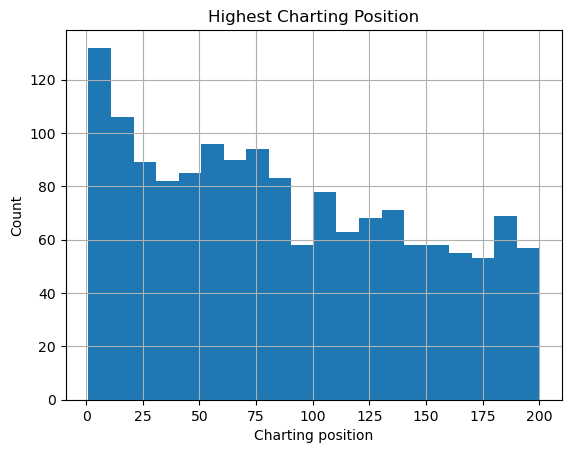

In [30]:
df['Highest Charting Position'].hist(bins=20)
plt.title('Highest Charting Position')
plt.xlabel('Charting position')
plt.ylabel('Count')
plt.show()

### Streams formatting

In [31]:
df.Streams.describe()

count           1545
unique          1545
top       48,633,449
freq               1
Name: Streams, dtype: object

There are not in a float format, we convert it

In [32]:
df.Streams = df.Streams.apply(lambda x : x.replace(',',''))
df.Streams = df.Streams.apply(lambda x : int(x))

In [33]:
df.Streams.describe()

count    1.545000e+03
mean     6.337136e+06
std      3.375402e+06
min      4.176083e+06
25%      4.915080e+06
50%      5.269163e+06
75%      6.452492e+06
max      4.863345e+07
Name: Streams, dtype: float64

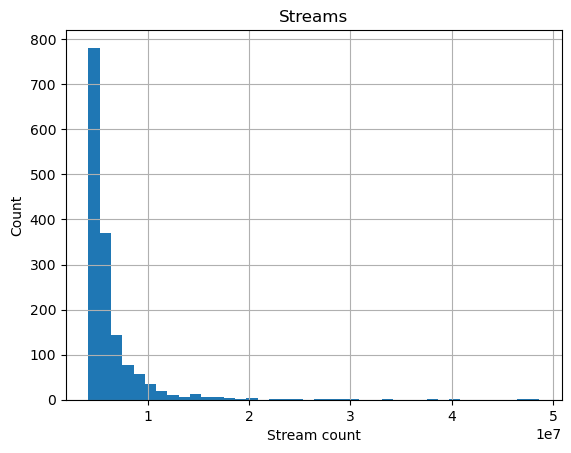

In [34]:
df['Streams'].hist(bins=40)
plt.title('Streams')
plt.xlabel('Stream count')
plt.ylabel('Count')
plt.show()

### Song id

In [46]:
len(df[df['Song ID'].isnull()])

0

In [47]:
len(df[df['Song ID']==' '])

0

In [48]:
df['Song ID'].is_unique

False

We see the Song ID is not unique to each song, which is surprising.

Indeed, there are several songs with duplicated song ID :

In [49]:
df[df['Song ID'].duplicated()]

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
Index,,,,,,,,,,,,,,,,,,,,,
64,2,34,2021-02-26--2021-03-05,Save Your Tears,8843110,The Weeknd,35305637,37BZB0z9T8Xu7U3e65qxFy,"canadian contemporary r&b, canadian pop, pop",2021-04-23,...,0.65,0.825,-4.645,0.0325,0.0215,0.0936,118.091,191014,0.593,C
101,52,19,2020-03-27--2020-04-03,Levitating,6799831,Dua Lipa,27142474,463CkQjx2Zk1yXoBuierM9,"dance pop, pop, uk pop",2020-10-01,...,0.702,0.825,-3.787,0.0601,0.00883,0.0674,102.977,203064,0.915,F#/Gb
145,13,83,2020-04-24--2020-05-01,goosebumps,5691540,Travis Scott,17719446,5uEYRdEIh9Bo4fpjDd4Na9,"rap, slap house",2021-01-15,...,0.841,0.593,-7.846,0.0379,0.418,0.124,124.917,162803,0.808,C#/Db
224,28,23,2021-04-16--2021-04-23,911,6111108,Sech,8758283,27RSJHEA99Y0Vsow7nA37A,"latin, panamanian pop, reggaeton, trap latino",2021-07-09,...,0.816,0.71,-3.728,0.0398,0.165,0.292,93.02,208631,0.784,G
275,59,6,2021-05-28--2021-06-04,Poblado,6893939,"Crissin, Totoy El Frio, Natan & Shander",29051363,1WedZeiezCmCEOzLwhx0hV,"latin, reggaeton, reggaeton colombiano",2021-06-18,...,0.813,0.809,-5.382,0.0846,0.102,0.377,93.005,393280,0.646,D#/Eb
318,126,1,2021-06-04--2021-06-11,Voice of the Heroes,6249801,"Lil Baby, Lil Durk",7805880,4lUmnwRybYH7mMzf16xB0y,"atl hip hop, atl trap, rap, trap",2021-06-04,...,0.596,0.65,-5.167,0.337,0.138,0.14,133.997,257428,0.188,A
364,55,1,2021-05-14--2021-05-21,c l o s e,10712648,J. Cole,14097410,1D3z6HTiQsNmZxjl7F7eoG,"conscious hip hop, hip hop, north carolina hip...",2021-05-14,...,0.597,0.587,-7.026,0.137,0.0622,0.214,140.021,218802,0.0753,G
377,61,17,2020-12-04--2020-12-11,Body,5831357,"Russ Millions, Tion Wayne",323203,6uvMKqNlrSvcC4NaKnrwjZ,london rap,2021-04-22,...,0.883,0.674,-8.043,0.357,0.21,0.0678,141.02,278085,0.73,B
408,33,24,2021-01-08--2021-01-15,Goosebumps,5496962,HVME,17719446,5uEYRdEIh9Bo4fpjDd4Na9,"rap, slap house",2021-01-15,...,0.841,0.593,-7.846,0.0379,0.418,0.124,124.917,162803,0.808,C#/Db


In [50]:
# let's see for the first one
df[df['Song ID']=='37BZB0z9T8Xu7U3e65qxFy']

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
Index,,,,,,,,,,,,,,,,,,,,,
18,5,14,2021-04-23--2021-04-30,Save Your Tears (with Ariana Grande) (Remix),18053141,The Weeknd,35305637,37BZB0z9T8Xu7U3e65qxFy,"canadian contemporary r&b, canadian pop, pop",2021-04-23,...,0.65,0.825,-4.645,0.0325,0.0215,0.0936,118.091,191014,0.593,C
64,2,34,2021-02-26--2021-03-05,Save Your Tears,8843110,The Weeknd,35305637,37BZB0z9T8Xu7U3e65qxFy,"canadian contemporary r&b, canadian pop, pop",2021-04-23,...,0.65,0.825,-4.645,0.0325,0.0215,0.0936,118.091,191014,0.593,C


Indeed it is almost the same songs, it makes sense for them to have the same ID.

In [51]:
# let's see for the second one
df[df['Song ID']=='463CkQjx2Zk1yXoBuierM9']

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
Index,,,,,,,,,,,,,,,,,,,,,
11,4,43,2021-05-07--2021-05-14,Levitating (feat. DaBaby),23518010,Dua Lipa,27142474,463CkQjx2Zk1yXoBuierM9,"dance pop, pop, uk pop",2020-10-01,...,0.702,0.825,-3.787,0.0601,0.00883,0.0674,102.977,203064,0.915,F#/Gb
101,52,19,2020-03-27--2020-04-03,Levitating,6799831,Dua Lipa,27142474,463CkQjx2Zk1yXoBuierM9,"dance pop, pop, uk pop",2020-10-01,...,0.702,0.825,-3.787,0.0601,0.00883,0.0674,102.977,203064,0.915,F#/Gb


The same applies here, it is therefore not an error to have duplicate song IDs. We assume it is the same case for the other 27 duplicated song IDs.

### Danceability, Energy, Loudness, Speechiness, Acousticness, Liveness, Tempo, Duration, Valence
There are not in the right format, we cast them to float.

In [69]:
df[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 
    'Duration (ms)', 'Valence']] = df[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 
    'Duration (ms)', 'Valence']].astype(float) 

## Statistics

In [70]:
print('Here are some basic statistics about our data:', end = '\n\n')

print(f'--> There are {len(df)} songs of Spotify in this dataset.', end='\n\n')

first_date = df['Release Date'].min()
last_date = df['Release Date'].max()
print(f'--> The content we have was released between {first_date.year} and {last_date.year}.', end='\n\n')

n_singers = len(df.Artist.unique())
print(f'--> There are {n_singers} unique artists in this Spotify collection.', end='\n\n')

n_genres = len(genre_counts.keys())
print(f'--> There are {n_genres} unique genres.', end='\n\n')

Here are some basic statistics about our data:

--> There are 1545 songs of Spotify in this dataset.

--> The content we have was released between 1942 and 2021.

--> There are 712 unique artists in this Spotify collection.

--> There are 335 unique genres.



### Streams per year

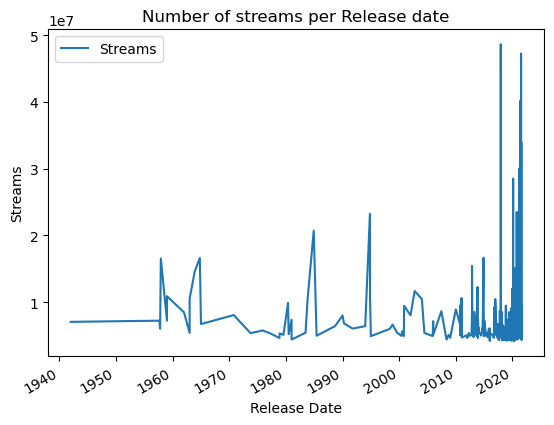

In [72]:
df.plot('Release Date','Streams')
plt.ylabel('Streams')
plt.title('Number of streams per Release date')
plt.show()
print()

We see the majority of streams are for songs released since 2018 approximately.

### Most popular genres

In [73]:
!pip install squarify

We create a dictionary with the genre that appear more than 50 times in the top 200.

In [74]:
genre_counts2 = dict((k, v) for k, v in genre_counts.items() if v >= 50)

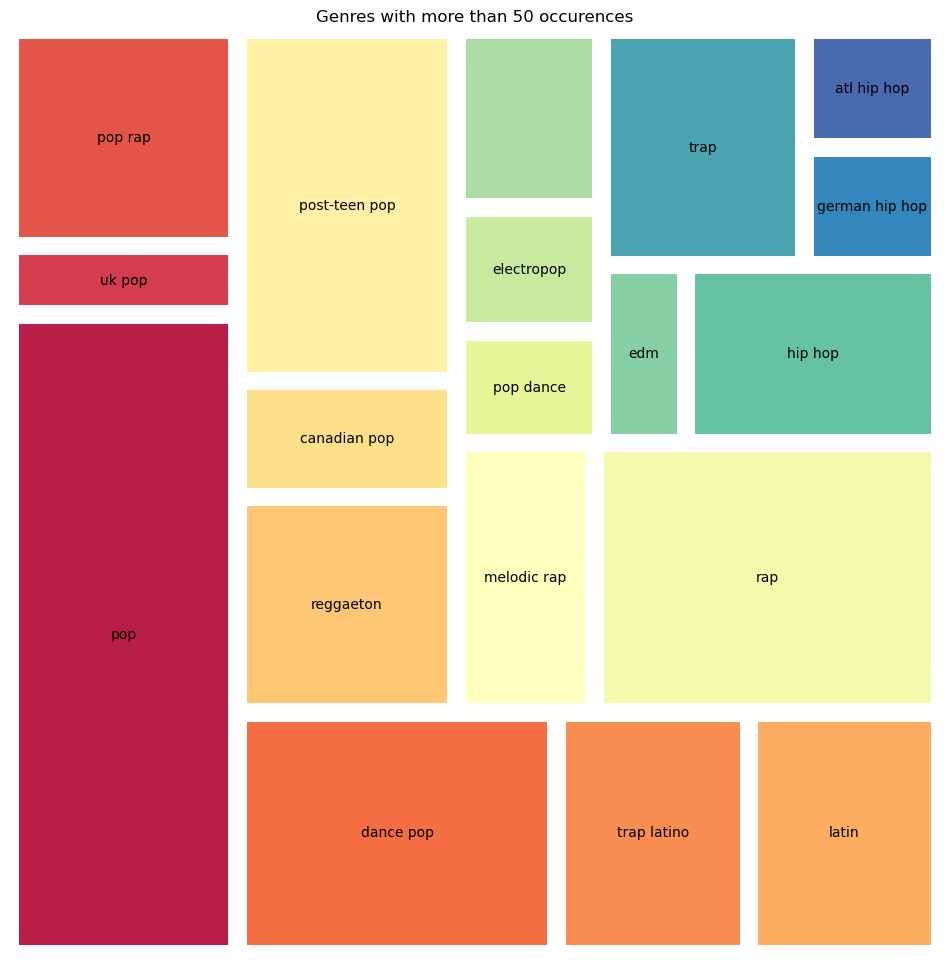

In [75]:
fig=plt.figure(figsize=(12,12))
subplot=fig.add_subplot(1,1,1)

norms = squarify.normalize_sizes(list(genre_counts2.values()),  dx=3, dy=3)
squarify.plot(sizes=norms, label=list(genre_counts2.keys()), color=sns.color_palette("Spectral", 
                                     len(genre_counts2)),alpha=1, pad=1,text_kwargs={'fontsize': 10},ax=subplot)
plt.axis("off")
plt.title('Genres with more than 50 occurences')
plt.show()
print()

### Artists with most streams

Let us see which artists had the most streams :

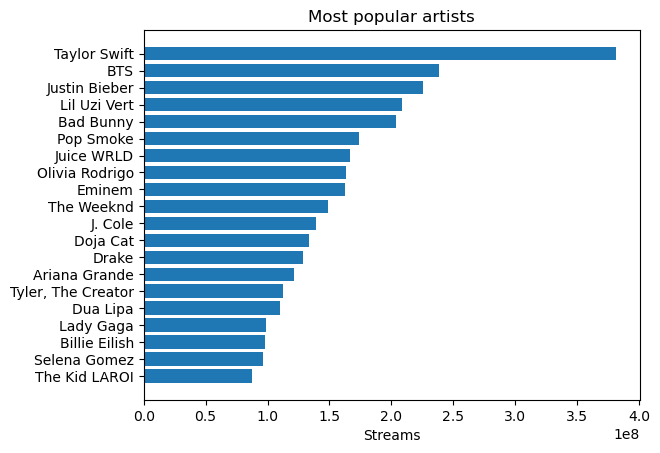

In [42]:
streams_per_artist = df[['Streams','Artist']].groupby('Artist').sum().sort_values(by='Streams',ascending=True)[-20:]

plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh(streams_per_artist.index, streams_per_artist.Streams,align='center')
ax.set_xlabel('Streams')
ax.set_title('Most popular artists')

plt.show()
print()

### Artists that have the most songs

Now let us see which artists have produced the most songs in this top 200 :

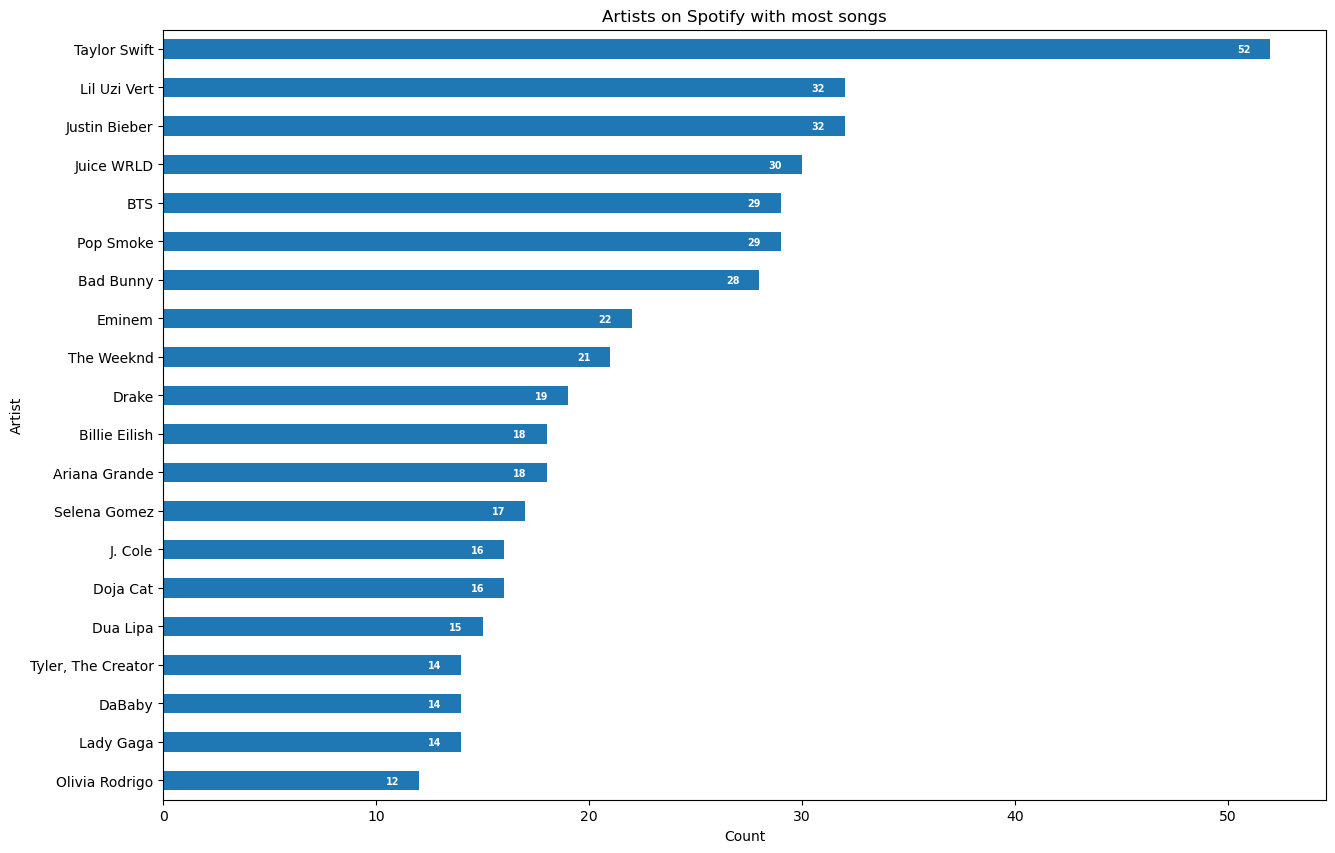

In [43]:
people = df['Artist'].dropna().explode('Artist')
people_count = people.value_counts(sort = True, ascending = True)
nb_people = people.nunique()
top_people = people_count[-20:]
    
fig, ax = plt.subplots(figsize=(15,10))
top_people.plot.barh(y = top_people, ax=ax)

for i, v in enumerate(top_people):
    ax.text((v/top_people.values.max() - 0.03)*top_people.values.max(), 
                i-0.10, str(v), 
            color = 'white', fontweight = 'bold', fontsize = 'x-small')
        
plt.title('Artists on Spotify with most songs')
plt.ylabel('Artist')
plt.xlabel('Count')
plt.show()

### Danceability over time

We create a new column to simplify the visualization of the properties over time

In [63]:
df["Release Year"] = df["Release Date"].apply(lambda x : x.year)

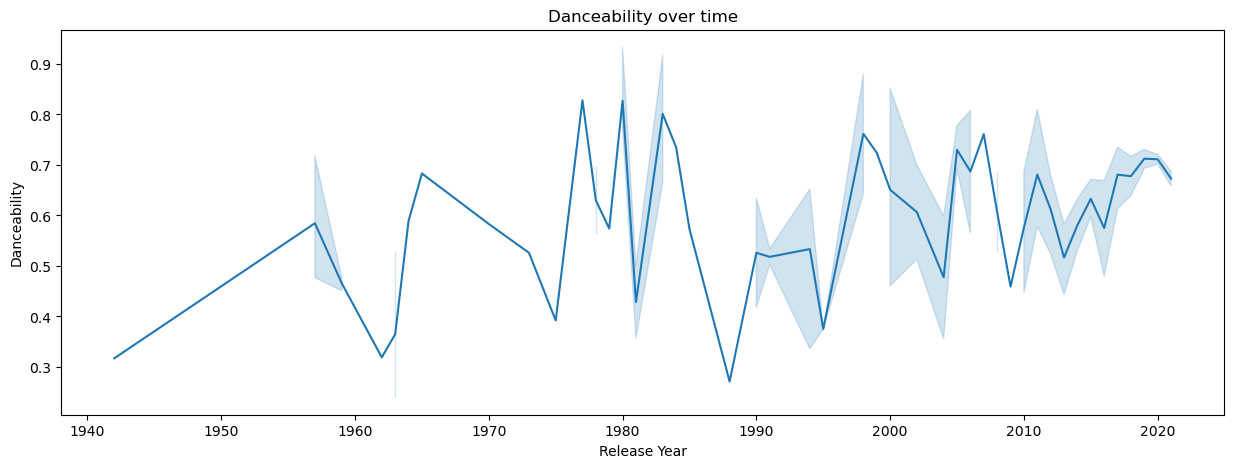

In [76]:
plt.figure(figsize=(15, 5))
plt.title('Danceability over time')
sns.lineplot(data=df, x="Release Year", y="Danceability")
plt.show()
print()

### Energy over time

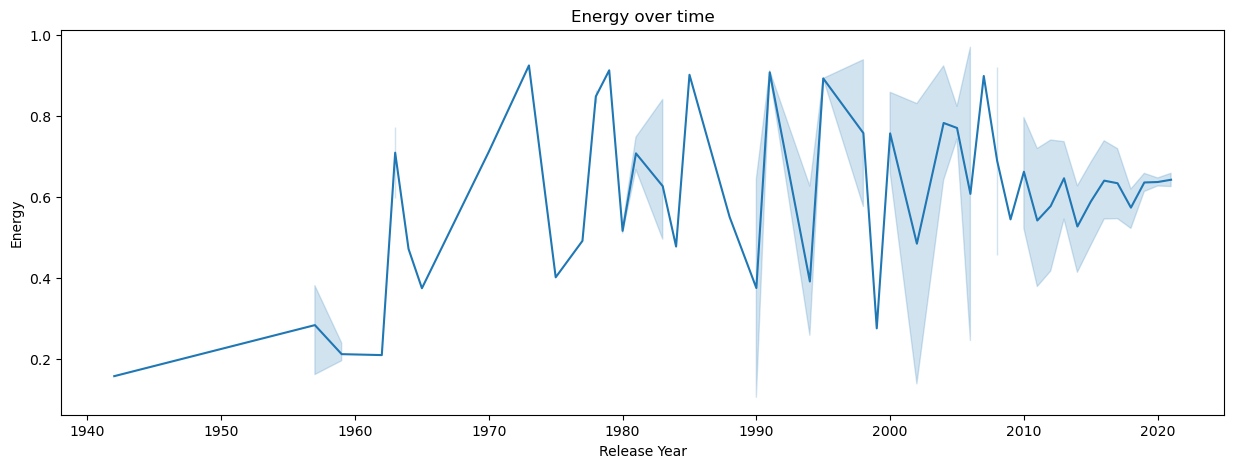

In [66]:
plt.figure(figsize=(15, 5))
plt.title('Energy over time')
sns.lineplot(data=df, x="Release Year", y="Energy")
plt.show()
print()

### Duration over time

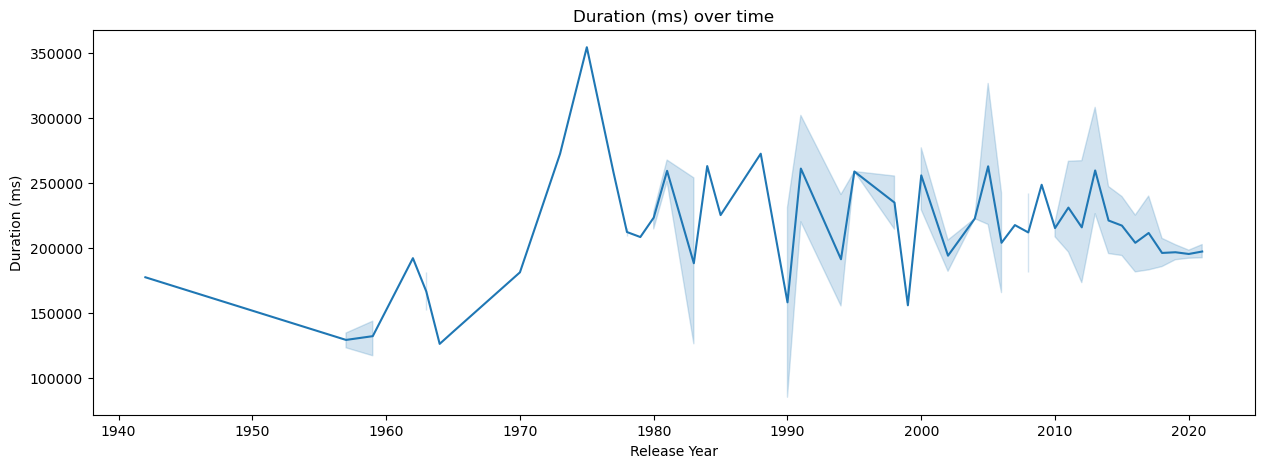

In [68]:
plt.figure(figsize=(15, 5))
plt.title('Duration (ms) over time')
sns.lineplot(data=df, x="Release Year", y="Duration (ms)")
plt.show()
print()